# Assignment 3
### Due 9/21. Do four of five.

In [1]:
import pandas as pd
import numpy as np

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [2]:
df = pd.read_csv('data/ames_prices.csv')

In [3]:
df.head(3)

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


Variables: Street and Fence

In [ ]:
df['street_na'] = df['Street'].isna()
df['street_na'].value_counts()

street_na
False    2930
Name: count, dtype: int64

all vals filled for Street

In [ ]:
df['fence_na'] = df['Fence'].isna()
df['fence_na'].value_counts()

fence_na
True     2358
False     572
Name: count, dtype: int64

Fence is missing a good proportion of values

In [8]:
pd.crosstab(df['fence_na'], df['Street'])

Street,Grvl,Pave
fence_na,,
False,1,571
True,11,2347


All records have street data, so there aren't any interesting patterns or findings related to its missing data. All but one records with grvl streets are missing data for fences, but proportionatley, grvl streets are much less less common than Pave streets.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [11]:
nhanes = pd.read_csv('data/nhanes_data_17_18.csv')

C:\Users\school\AppData\Local\Temp\ipykernel_48752\4123972769.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv('data/nhanes_data_17_18.csv')


In [12]:
nhanes.head(3)

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more


Numeric: AgeStoppedBreastfeedingdays


Categorical: GeneralHealthCondition

In [ ]:
nhanes['age_stopped_na'] = nhanes['AgeStoppedBreastfeedingdays'].isna()
nhanes['age_stopped_na'].value_counts()

age_stopped_na
True     7504
False     862
Name: count, dtype: int64

In [16]:
nhanes['general_health_na'] = nhanes['GeneralHealthCondition'].isna()
nhanes['general_health_na'].value_counts()

general_health_na
False    5964
True     2402
Name: count, dtype: int64

In [18]:
pd.crosstab(nhanes['age_stopped_na'], nhanes['general_health_na'])

general_health_na,False,True
age_stopped_na,,
False,0,862
True,5964,1540


There are no rows where both columns are present at once, so I will use a different numeric value for the next questions (CurrentSelfreportedWeightPounds)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
nhanes["log_weight"] = np.log(nhanes["CurrentSelfreportedWeightPounds"])

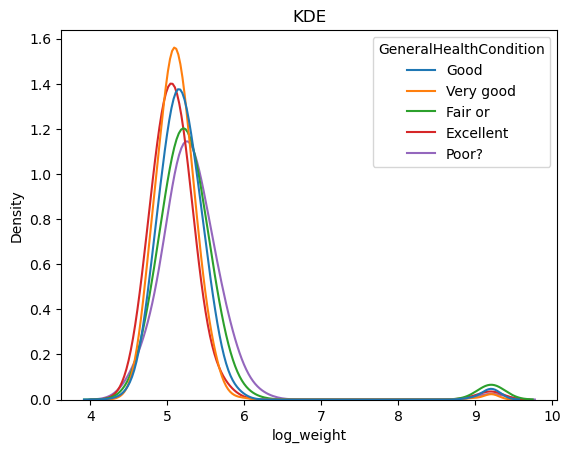

In [27]:
sns.kdeplot( data=nhanes, x='log_weight', hue='GeneralHealthCondition', common_norm=False ).set(title='KDE')
plt.show()

In [28]:
nhanes.loc[:,['CurrentSelfreportedWeightPounds', 'GeneralHealthCondition']].groupby('GeneralHealthCondition').describe()


CurrentSelfreportedWeightPounds              \
                                                 count        mean   
GeneralHealthCondition                                               
Excellent                                        500.0  315.410000   
Fair or                                         1134.0  483.822751   
Good                                            2262.0  334.106101   
Poor?                                            169.0  321.798817   
Very good                                       1352.0  238.725592   

                                                                        
                                std   min    25%    50%    75%     max  
GeneralHealthCondition                                                  
Excellent               1204.831420  90.0  135.0  158.0  185.0  9999.0  
Fair or                 1664.206135  86.0  155.0  185.0  225.0  9999.0  
Good                    1202.150398  72.0  148.0  175.0  210.0  9999.0  
Poor?                   1064.212601  95.0  165.0  196.0  240.0  9999.0  
Very good                809.140090  85.0  140.0  165.0  192.0  9999.0

Variation between each condition in the kde is in a very small range. The peak value at poor seems to be the right-most out of all the conditions, and the excellent peak appears to be the leftmost. The value where most individuals are labelled as excellent is lower than the value where other indivivduals are categorized for the other categories, and the opposite is true for those labelled as 'Poor?'. The means don't quite support the same narrative, as excellent has the second lowest mean and poor has the third highest mean. Less people are labelled at the extreme ends (Excellent/Poor), and more people are labelled within the middle three categories (Fair, Good, and Very Good).

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome